## Ex9: Pour le modèle de Wright-Fisher, estimer la probabilité d'arriver à l'extinction d'un allèle après 500 générations en fonction de la taille de la population en commençant avec une probabilité de 0,5 pour chaque allèle. Utiliser des populations de taille 100 à 700 par pas de 100 et représenter graphiquement les résultats. Commenter leur cohérence avec les résultats théoriques vus en cours

In [128]:
import random 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 1) Le modèle

#### Paramètres de la simulation

In [58]:
F = 0.5          # ... allele frequency at the start
N=100            # ... size of the population
generations=500  # ... number of generations to simulate
exp=10            # ... number of experiments (replicates)

#### Fonction : Calcul de la fréquence allélique à la population suivante

In [57]:
def next_generation(var_p):
    draws = 2 * N
    a = 0
    b = 0
    # randomly draw 2 * N alleles 
    for i in range(draws):
        # ... either a is randamly selected
        if random.random() < var_p:
            a = a + 1
        # ... or b is randomly selected
        else:
            b = b + 1
    # computing p
    p = a / draws
    return p

#### Run de la simulation

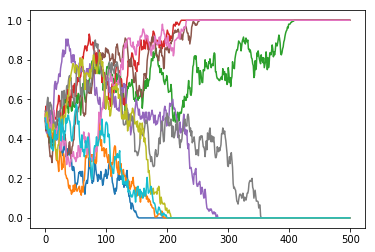

In [59]:
p_evolution = np.zeros((exp,generations))

for i in range(exp):
    p = F
    for n in range(generations):
        p = next_generation(p)
        p_evolution[i][n]=p
        

plt.plot(p_evolution.transpose())
plt.show()

### 2) Après 500 génerations, quelle est la probabilité qu'un allèle ce soit éteind ?

#### Fonction : Next_generation tenant compte de la taille de la population

In [111]:
def next_generation(var_p, size_population):
    draws = 2 * size_population
    a = 0
    b = 0
    # randomly draw 2 * N alleles 
    for i in range(draws):
        # ... either a is randamly selected
        if random.random() < var_p:
            a = a + 1
        # ... or b is randomly selected
        else:
            b = b + 1
    # computing p
    p = a / draws
    return p

#### Fonction : Probabilité d'extinction d'un allèle

Arguments de la fonction
   - frequency_start : la fréquence de l'allèle au début de la simulation
   - replicates : le nombre d'allèles indépendants (on s'e servira pour calculer une probabilité)
   - Generations : Le nombre de générations après lesquelles on regarde
   - size_population : La taille de la population

A chaque fois qu'un allèle s'éteind (fréquence == 0), on arête sa simulation et on implémente un compteur. Une fois toutes les simulations terminées, on calcule une probabilité

In [120]:
def Proba_extinction( frequency_start , replicates , generations, size_population ):
    
    p_evolution = np.zeros( ( replicates , generations ) )
    
    extinct_allele = 0
    
    for i in range(replicates):
        p = frequency_start
        for n in range(generations):
            p = next_generation(p, size_population)
            p_evolution[i][n]=p
            if p == 0:
                extinct_allele += 1
                break
                
    return (extinct_allele/replicates)

#### Run de la fonction

Les paramètres de la simulation

In [153]:
pop_min = 100
pop_max = 700
pop_step = 100

proba_start = 0.5
replicates = 1000
generations = 500

Un dataframe ; on pourrait le faire vide mais pourquoi ne pas déjà le remplir avec les tailles de populations ?

In [155]:
df = pd.DataFrame({'Population_size' : [i for i in range(pop_min, pop_max+pop_step, pop_step)],
                        'Prob_extinction' : [0 for steps in range(pop_min, pop_max+pop_step, pop_step)]} ,  
                       columns= [ 'Population_size','Prob_extinction'])

On run la simulation et on incrémente le dataframe

In [156]:
for i in range(pop_min, pop_max+pop_step, pop_step):
    df.loc[df["Population_size"] == i, 'Prob_extinction'] += Proba_extinction(proba_start, replicates, generations, i)

#### Visualisation

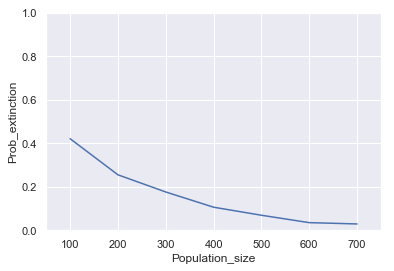

In [157]:
sns.set()
sns.lineplot(x = 'Population_size', y = 'Prob_extinction', data = df)
plt.ylim(0, 1)
plt.xlim(50, 750)
plt.show()